In [7]:
pip install netCDF4


In [8]:
pip install tensorflow==1.13.1

     |████████████████████████████████| 92.5MB 45kB/s 
     |████████████████████████████████| 368kB 33.7MB/s 
     |████████████████████████████████| 3.2MB 39.3MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [1]:
import numpy as np
import gzip
from netCDF4 import Dataset
import pandas as pd
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import os
from datetime import timedelta, datetime
#from vard import var2d,var3d

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pickle

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [2]:
print(tf.__version__)

1.13.1


In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/UIS_IA/PROYECTO_IA
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/UIS_IA/PROYECTO_IA
/content/drive/My Drive/UIS_IA/PROYECTO_IA


In [0]:
rutael = '/content/drive/My Drive/UIS_IA/PROYECTO_IA/data/2018YLSANTSERIES/'
rutaep = '/content/drive/My Drive/UIS_IA/PROYECTO_IA/data/2018YPSANTSERIES/'
rutapr = '/content/drive/My Drive/UIS_IA/PROYECTO_IA/data/'


########################################################################################################

path_data_inun = rutapr+'eventos_inundacion_sant3.xlsx'
data_inun = pd.read_excel(path_data_inun)
fec_inun = data_inun['Fecha']


########################################################################################################


erasl = np.sort(glob.glob(rutael+'*.nc'))
erasp = np.sort(glob.glob(rutaep+'*.nc'))


samplel = np.array(Dataset(erasl[0]).variables['u10'][:,0,0])

########################################################################################################
matriz_eral = np.zeros([len(samplel),len(erasl)])*np.nan
namesl = []
########################################################################################################

for i in range(len(erasl)):
    datat = Dataset(erasl[i])
    vari = list(datat.variables.keys())[-1]

    data = np.array(datat.variables[vari][:,0,0])
    matriz_eral[:,i] = data
    namesl.append(vari)
    
namesl = np.array(namesl)

samplep = Dataset(erasp[0])
samplepl = samplep.variables['level'][:]
samplepl[-2] = 200.
samplepl[-3] = 300.

########################################################################################################
matriz_erap = np.zeros([len(samplel),len(erasp)*len(samplepl)])*np.nan
namesp = []
########################################################################################################


In [0]:
for i in range(len(erasp)):
    datat = Dataset(erasp[i])
    vari = list(datat.variables.keys())[-1]
    levs = datat.variables['level'][:]
    data = np.array(datat.variables[vari][:,:,0,0])
    data2 = data.copy()

    l1 = levs[-2]
    l2 = levs[-3]

    d1 = data2[:,-2]
    d2 = data2[:,-3]

    
    levs[-2] = l2
    levs[-3] = l1



    data[:,-2] = d2 
    data[:,-3] = d1


    oj = (len(levs)-1)*i

    for j in range(len(levs)):

        if len(vari) == 1:

            if len(str(levs[j])[:-2])==4:
                name = vari+vari+str(levs[j])[:-2]
            else:
                name = vari+vari+'0'+str(levs[j])[:-2]
                
                
        else:
            if len(str(levs[j])[:-2])==4:
                
                name = vari+str(levs[j])[:-2]
            else:
                name = vari+'0'+str(levs[j])[:-2]
                
            
        namesp.append(name)
        
        ic = i+j + oj
        
        dato = data[:,j]
        
        matriz_erap[:,ic] = dato


namesp = np.array(namesp)



pre = Dataset(rutapr+'prce_santserie_2018.nc')
pri = Dataset(rutapr+'prci_santserie_2018.nc')

dates = pd.date_range('2018-01-01 00:00:00','2018-12-31 23:45:00',freq='1h')

########################################################################################################

rain_era = pd.DataFrame(pre.variables['tp'][:,0,0]*1000.,index=dates,columns=['ppt'])
rain_ime = pd.DataFrame(pri.variables['precipitationCal'][:,0,0],index=dates,columns=['ppt'])


########################################################################################################


datafvarp = pd.DataFrame(matriz_erap,index=dates,columns=namesp)
datafvarl = pd.DataFrame(matriz_eral,index=dates,columns=namesl)
#print(datafvar)

datafvarp = pd.concat([datafvarp, datafvarl], axis=1, sort=False)

datafvarp2 = datafvarp.copy()
rain_ime2 = rain_ime.copy()

#print(datafvarp2)

In [6]:

for i,t in enumerate(fec_inun):

    t1 = t+ timedelta(hours=5)
    fd_evento = str(t1)[0:10]
    #muni = fec_mun[i].replace(' ','_')
    #print(fd_evento[0:10])
    
    t2 = t + timedelta(hours=48)

    datar = pd.date_range(str(t1),str(t2),freq='1h')

    print(t1,t2)

    
    datafvarp2 = datafvarp2.drop(datar)
    rain_ime2 = rain_ime2.drop(datar)



print(datafvarp2.shape,rain_ime2.shape)

2018-03-05 05:00:00 2018-03-07 00:00:00
2018-04-02 05:00:00 2018-04-04 00:00:00
2018-05-03 05:00:00 2018-05-05 00:00:00
2018-05-06 05:00:00 2018-05-08 00:00:00
2018-05-10 05:00:00 2018-05-12 00:00:00
2018-05-12 05:00:00 2018-05-14 00:00:00
2018-05-18 05:00:00 2018-05-20 00:00:00
2018-05-20 05:00:00 2018-05-22 00:00:00
2018-05-25 05:00:00 2018-05-27 00:00:00
2018-07-24 05:00:00 2018-07-26 00:00:00
2018-07-26 05:00:00 2018-07-28 00:00:00
2018-10-23 05:00:00 2018-10-25 00:00:00
2018-11-17 05:00:00 2018-11-19 00:00:00
(8188, 191) (8188, 1)


2018-03-05 05:00:00 2018-03-07 00:00:00
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
8188/8188 [==============================] - 1s 165us/sample - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 2/20
8188/8188 [==============================] - 1s 149us/sample - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 3/20
8188/8188 [==============================] - 1s 154us/sample - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 4/20
8188/8188 [==============================] - 1s 150us/sample - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 5/20
8188/8188 [==============================] - 1s 146us/sample - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 6/20
8188/8188 [==============================] - 1s 148us/sample - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 7/20
8188/8188 [==============================] - 1s 144us/sample - loss: 0.0069 - mean_sq

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


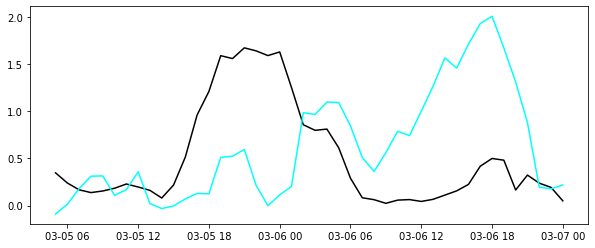

2018-04-02 05:00:00 2018-04-04 00:00:00
Epoch 1/20
8188/8188 [==============================] - 1s 167us/sample - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 2/20
8188/8188 [==============================] - 1s 154us/sample - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 3/20
8188/8188 [==============================] - 1s 157us/sample - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 4/20
8188/8188 [==============================] - 1s 149us/sample - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 5/20
8188/8188 [==============================] - 1s 155us/sample - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 6/20
8188/8188 [==============================] - 1s 149us/sample - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 7/20
8188/8188 [==============================] - 1s 153us/sample - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 8/20
8188/8188 [==============================] - 1s 153us/sample - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 9/20
8188/8188 [==========

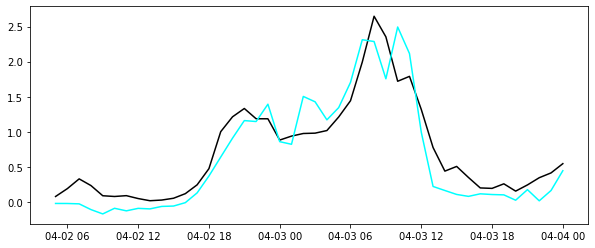

2018-05-03 05:00:00 2018-05-05 00:00:00
Epoch 1/20
8188/8188 [==============================] - 1s 170us/sample - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 2/20
8188/8188 [==============================] - 1s 157us/sample - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 3/20
8188/8188 [==============================] - 1s 153us/sample - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 4/20
8188/8188 [==============================] - 1s 150us/sample - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 5/20
8188/8188 [==============================] - 1s 151us/sample - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 6/20
8188/8188 [==============================] - 1s 153us/sample - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 7/20
8188/8188 [==============================] - 1s 157us/sample - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 8/20
8188/8188 [==============================] - 1s 151us/sample - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 9/20
8188/8188 [==========

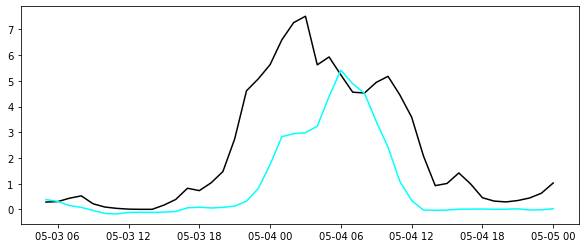

2018-05-06 05:00:00 2018-05-08 00:00:00
Epoch 1/20
8188/8188 [==============================] - 1s 175us/sample - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 2/20
8188/8188 [==============================] - 1s 152us/sample - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 3/20
8188/8188 [==============================] - 1s 152us/sample - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 4/20
8188/8188 [==============================] - 1s 157us/sample - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 5/20
8188/8188 [==============================] - 1s 158us/sample - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 6/20
8188/8188 [==============================] - 1s 154us/sample - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 7/20
8188/8188 [==============================] - 1s 158us/sample - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 8/20
8188/8188 [==============================] - 1s 156us/sample - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 9/20
8188/8188 [==========

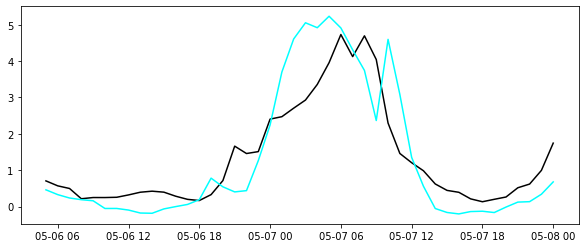

2018-05-10 05:00:00 2018-05-12 00:00:00
Epoch 1/20
8188/8188 [==============================] - 1s 172us/sample - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 2/20
8188/8188 [==============================] - 1s 159us/sample - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 3/20
8188/8188 [==============================] - 1s 156us/sample - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 4/20
8188/8188 [==============================] - 1s 154us/sample - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 5/20
8188/8188 [==============================] - 1s 156us/sample - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 6/20
8188/8188 [==============================] - 1s 149us/sample - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 7/20
8188/8188 [==============================] - 1s 155us/sample - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 8/20
8188/8188 [==============================] - 1s 155us/sample - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 9/20
8188/8188 [==========

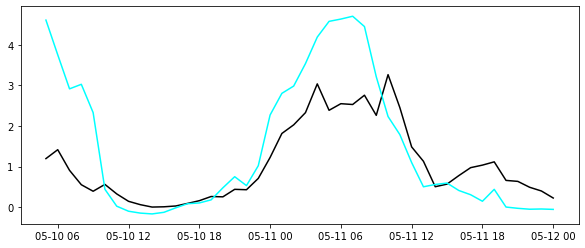

2018-05-12 05:00:00 2018-05-14 00:00:00
Epoch 1/20
8188/8188 [==============================] - 1s 177us/sample - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 2/20
8188/8188 [==============================] - 1s 158us/sample - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 3/20
8188/8188 [==============================] - 1s 154us/sample - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 4/20
8188/8188 [==============================] - 1s 153us/sample - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 5/20
8188/8188 [==============================] - 1s 153us/sample - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 6/20
8188/8188 [==============================] - 1s 154us/sample - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 7/20
8188/8188 [==============================] - 1s 156us/sample - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 8/20
8188/8188 [==============================] - 1s 154us/sample - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 9/20
8188/8188 [==========

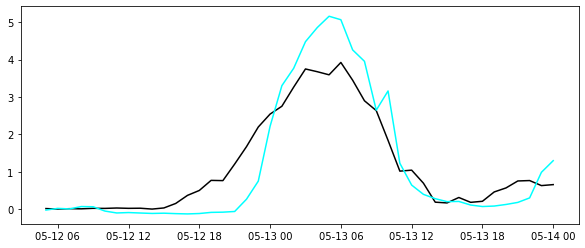

2018-05-18 05:00:00 2018-05-20 00:00:00
Epoch 1/20
8188/8188 [==============================] - 1s 175us/sample - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 2/20
8188/8188 [==============================] - 1s 158us/sample - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 3/20
8188/8188 [==============================] - 1s 160us/sample - loss: 0.0079 - mean_squared_error: 0.0079
Epoch 4/20
8188/8188 [==============================] - 1s 159us/sample - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 5/20
8188/8188 [==============================] - 1s 157us/sample - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 6/20
8188/8188 [==============================] - 1s 160us/sample - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 7/20
8188/8188 [==============================] - 1s 155us/sample - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 8/20
8188/8188 [==============================] - 1s 155us/sample - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 9/20
8188/8188 [==========

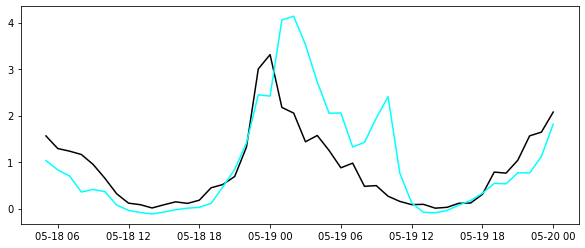

2018-05-20 05:00:00 2018-05-22 00:00:00
Epoch 1/20
8188/8188 [==============================] - 1s 175us/sample - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 2/20
8188/8188 [==============================] - 1s 155us/sample - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 3/20
8188/8188 [==============================] - 1s 162us/sample - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 4/20
8188/8188 [==============================] - 1s 153us/sample - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 5/20
8188/8188 [==============================] - 1s 157us/sample - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 6/20
8188/8188 [==============================] - 1s 157us/sample - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 7/20
8188/8188 [==============================] - 1s 155us/sample - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 8/20
8188/8188 [==============================] - 1s 156us/sample - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 9/20
8188/8188 [==========

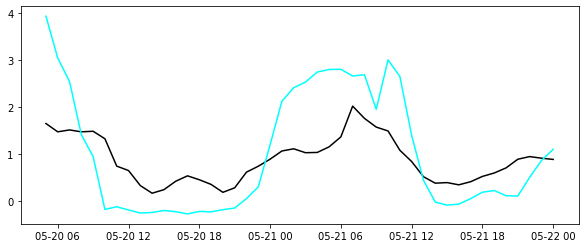

2018-05-25 05:00:00 2018-05-27 00:00:00
Epoch 1/20
8188/8188 [==============================] - 2s 184us/sample - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 2/20
8188/8188 [==============================] - 1s 161us/sample - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 3/20
8188/8188 [==============================] - 1s 155us/sample - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 4/20
8188/8188 [==============================] - 1s 158us/sample - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 5/20
8188/8188 [==============================] - 1s 161us/sample - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 6/20
8188/8188 [==============================] - 1s 157us/sample - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 7/20
8188/8188 [==============================] - 1s 158us/sample - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 8/20
8188/8188 [==============================] - 1s 160us/sample - loss: 0.0068 - mean_squared_error: 0.0068
Epoch 9/20
8188/8188 [==========

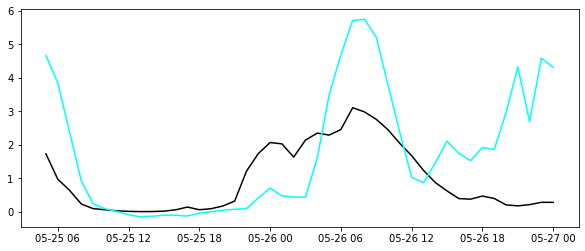

2018-07-24 05:00:00 2018-07-26 00:00:00
Epoch 1/20
8188/8188 [==============================] - 1s 183us/sample - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 2/20
8188/8188 [==============================] - 1s 158us/sample - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 3/20
8188/8188 [==============================] - 1s 162us/sample - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 4/20
8188/8188 [==============================] - 1s 159us/sample - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 5/20
8188/8188 [==============================] - 1s 156us/sample - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 6/20
8188/8188 [==============================] - 1s 159us/sample - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 7/20
8188/8188 [==============================] - 1s 160us/sample - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 8/20
8188/8188 [==============================] - 1s 157us/sample - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 9/20
8188/8188 [==========

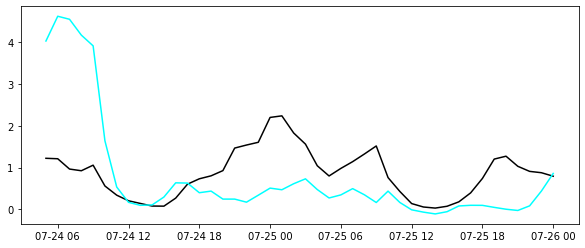

2018-07-26 05:00:00 2018-07-28 00:00:00
Epoch 1/20
8188/8188 [==============================] - 2s 186us/sample - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 2/20
8188/8188 [==============================] - 1s 158us/sample - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 3/20
8188/8188 [==============================] - 1s 166us/sample - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 4/20
8188/8188 [==============================] - 1s 159us/sample - loss: 0.0076 - mean_squared_error: 0.0076
Epoch 5/20
8188/8188 [==============================] - 1s 157us/sample - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 6/20
8188/8188 [==============================] - 1s 162us/sample - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 7/20
8188/8188 [==============================] - 1s 158us/sample - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 8/20
8188/8188 [==============================] - 1s 154us/sample - loss: 0.0071 - mean_squared_error: 0.0071
Epoch 9/20
8188/8188 [==========

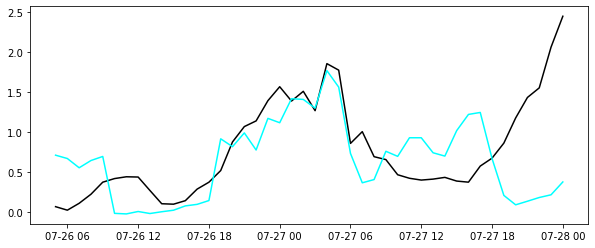

2018-10-23 05:00:00 2018-10-25 00:00:00
Epoch 1/20
8188/8188 [==============================] - 1s 181us/sample - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 2/20
8188/8188 [==============================] - 1s 156us/sample - loss: 0.0081 - mean_squared_error: 0.0081
Epoch 3/20
8188/8188 [==============================] - 1s 164us/sample - loss: 0.0086 - mean_squared_error: 0.0086
Epoch 4/20
8188/8188 [==============================] - 1s 159us/sample - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 5/20
8188/8188 [==============================] - 1s 159us/sample - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 6/20
8188/8188 [==============================] - 1s 159us/sample - loss: 0.0069 - mean_squared_error: 0.0069
Epoch 7/20
8188/8188 [==============================] - 1s 156us/sample - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 8/20
8188/8188 [==============================] - 1s 160us/sample - loss: 0.0070 - mean_squared_error: 0.0070
Epoch 9/20
8188/8188 [==========

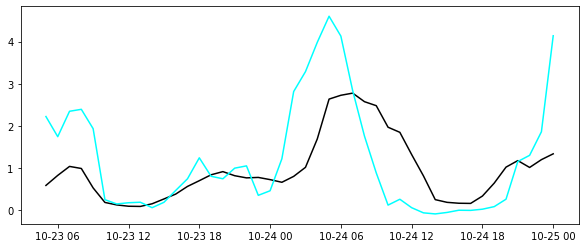

2018-11-17 05:00:00 2018-11-19 00:00:00
Epoch 1/20
8188/8188 [==============================] - 2s 185us/sample - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 2/20
8188/8188 [==============================] - 1s 161us/sample - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 3/20
8188/8188 [==============================] - 1s 163us/sample - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 4/20
8188/8188 [==============================] - 1s 159us/sample - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 5/20
8188/8188 [==============================] - 1s 153us/sample - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 6/20
8188/8188 [==============================] - 1s 159us/sample - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 7/20
8188/8188 [==============================] - 1s 161us/sample - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 8/20
8188/8188 [==============================] - 1s 158us/sample - loss: 0.0072 - mean_squared_error: 0.0072
Epoch 9/20
8188/8188 [==========

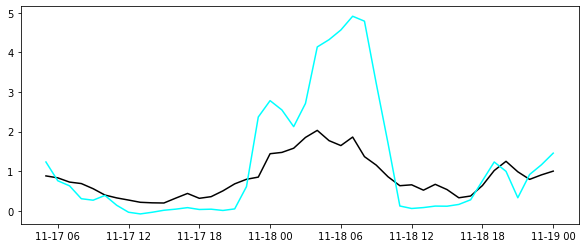

In [7]:
rsavemod = '/content/drive/My Drive/UIS_IA/PROYECTO_IA/models/'
#dnn = keras.models.load_model(rsavemod+'model_1')

for i,t in enumerate(fec_inun):

    t1 = t+ timedelta(hours=5)
    fd_evento = str(t1)[0:10]
    #muni = fec_mun[i].replace(' ','_')
    #print(fd_evento[0:10])
    
    t2 = t + timedelta(hours=48)
    print(t1,t2)

    datafvarp3 = datafvarp[t1:t2]
    rain_ime3 = rain_ime[t1:t2]

    # DNN
    #####################################################################
    
#    dnn = keras.models.Sequential([
#        keras.layers.Dense(162, activation=tf.nn.relu, input_shape=[191]),
#        keras.layers.Dense(100, activation=tf.nn.relu),
#        keras.layers.Dense(50, activation=tf.nn.relu),
#        keras.layers.Dense(30, activation=tf.nn.relu),
#        keras.layers.Dense(10, activation=tf.nn.relu),
#        keras.layers.Dense(1)
#        ])
    

    dnn = keras.models.Sequential()
    dnn.add(keras.layers.Dense(500, input_dim=191, activation= "relu"))
    dnn.add(keras.layers.Dense(100, activation= "relu"))
    dnn.add(keras.layers.Dense(50, activation= "relu"))
    dnn.add(keras.layers.Dense(1))

    sca1 = MinMaxScaler()
    sca2 = MinMaxScaler()
    sca3 = MinMaxScaler()

    sca1.fit(datafvarp2)
    sca2.fit(rain_ime2)
    sca3.fit(datafvarp3.values)

    xs = sca1.transform(datafvarp2)
    ys = sca2.transform(rain_ime2)
    xs2 = sca3.transform(datafvarp3.values)    

#    optimizer = tf.keras.optimizers.RMSprop(0.0099)
    
#    dnn.compile(loss='mean_squared_error',
#                optimizer=optimizer,
#                metrics=['mae', 'mse'])
    
    dnn.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
    history = dnn.fit(xs, ys, epochs=20)

    #history = dnn.fit(xs, ys,batch_size=1000,epochs=15)

    dnn.reset_metrics()

    dnn.save(rsavemod+'model_'+str(i))


    dnnregp = dnn.predict(xs2)
    dnnregp = sca2.inverse_transform(dnnregp.reshape(-1, 1))
    dnnregpf = pd.DataFrame(dnnregp,index=rain_ime3.index)
    #####################################################################

    
    #print(Dtregp)

    plt.figure(figsize=[10,4])
    plt.plot(rain_ime3,color='k')
    plt.plot(dnnregpf,color='cyan')
    
    plt.show()

    


